<a href="https://colab.research.google.com/github/carlosegn/phishing-detection/blob/main/proyecto2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Proyecto 2 - EDA**
## Creado por: Carlos Guerrero

* Fecha creado: 04/04/2023
* Fecha actualización: 07/04/2023
* Descripción: EDA de la base de datos seleccionada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Proyectos/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
# Cuántas filas y columnas tiene nuestro base de datos
df.shape

(11430, 89)

**Diccionario de datos**  

| Característica | Tipo | Descripción |
| ----------- | ----------- | ----------- |
| url | object | Dirección del sitio web |
| length_url | int | Longitud de la URL. URLs largas son generalmente usadas para esconder dominios reales |
| length_hostname | int | Longitud del nombre del host |
| ip | object | 0/1 Dirección IP, identifica si el sitio web tiene (1) o no (0)una dirección IP en la URL, la presencia de IPs es considerado un indicador de Phishing |
| nb_dots | int | Número de ocurrencias de punto (.) |
| nb_hyphens | int | Número de ocurrencias de guiones (-) |
| nb_at | int | Número de ocurrencias de arrobas (@) |
| nb_qm | int | Número de ocurrencias de signos de interrogación (?) |
| nb_and | int | Número de ocurrencias de ampersand (&) |
| nb_or | int | Número de ocurrencias de tuberías (\|) |
| nb_eq | int | Número de ocurrencias de signo igual (=) |
| nb\_underscore | int | Número de ocurrencias de subguión  (\_) |
| nb_tilde | int | Número de ocurrencias de comillas (") |
| nb_percent | int | Número de ocurrencias de porcentaje (%) |
| nb_slash | int | Número de ocurrencias de slash (/) |
| nb_star | int | Número de ocurrencias de asteriscos (*) |
| nb_colon | int | Número de ocurrencias de dos puntos (:) |
| nb_comma | int | Número de ocurrencias de comas (,) |
| nb_semicolumn | int | Número de ocurrencias de punto y coma (;) |
| nb_dollar | int | Número de ocurrencias de símbolo de dolar ($) |
| nb_space | int | Número de ocurrencias de espacio (%20) |
| nb_www | int | Número de ocurrencias de www |
| nb_com | int | Número de ocurrencias de .com |
| nb_dslash | int | Número de ocurrencias de doble slash (//) |
| http_in_path | int | Número de ocurrencias de http |
| https_token | object | 0/1 La mayor parte de sitios phishing no proveen ninguna seguridad, por tanto HTTPs es un indicador de un sitio seguro |
| ratio_digits_url | float | Ratio de digitos en la URL. Un alto número de digitos en una URL es un indicador de Phishing |
| ratio_digits_host | float | Ratio de digitos en el nombre de host |
| punycode | object | 0/1 Punycode es utilizado en los nombres de dominio para reemplazar algunos códigos ASCII con caracteres Unicode, su presencia es considerada phishing |
| port | object | 0/1 Indica si la URL tiene o no puerto, la presencia de puertos en la URL es considerada Phishing |
| tld_in_path | object | 0/1 Top Level Domain (TDL) dentro del path, en una URL legítima el TLD sólo debería estar antes del path. El TDL dentro del path es considerado phishing |
| tld_in_subdomain | object | 0/1 Top Level Domain (TDL) dentro del subdominio. El TDL dentro del subdominio es considerado phishing |
| abnormal_subdomain | object | 0/1 URLs que tienen un patrón 'w[w]?[0-9]*' en lugar de www son consideradas phishing |
| nb_subdomains | int | Número subdominios utilizados, las URLs de phishing usan más sudominios |
| prefix_suffix | object | 0/1 Si existen prefijos o sufijos separados con "-" en la URL es considerada phishing |
| random_domain | object | 0/1 Si existen palabras formadas por caracteres aleatorios |
| shortening_service | object | 0/1 Los servicios para encojer URL suelen ser usados para enmascarar direcciones largas, por tanto es considerado como indicador de phishing |
| path_extension | object | 0/1 Presencia de extensiones como 'txt', 'exe', 'js', son indicadores de phishing |
| nb_redirection | int | Número de redirecciones de un sitio web |
| nb_external_redirection | int | Número de redirecciones externas de un sitio web |
| length_words_raw | int | Número de palabras en URL |
| char_repeat | int | Número de repetición de caracteres en URL |
| shortest_words_raw | int | Palabras más cortas en las URL |
| shortest_word_host | int | Palabras más cortas en el nombre de host |
| shortest_word_path | int | Palabras más cortas en paths |
| longest_words_raw | int | Palabras más largas en las URL |
| longest_word_host | int | Palabras más largas en el nombre de host |
| longest_word_path | int | Palabras más largas en paths |
| avg_words_raw | int | Promedio de longitud de palabras en URL |
| avg_word_host | int | Promedio de longitud de palabras en el nombre de host |
| avg_word_path | int | Promedio de longitud de palabras en el path |
| phish_hints | int | Las URL de phishing utilizan palabras confidenciales para ganar confianza en las páginas web visitadas. El número de tales palabras en las URL se considera un indicador de phishing |
| domain_in_brand | object | 0/1 Marca en dominio es considerado legítimo |
|brand_in_subdomain | object | 0/1 Marca en subdominio es considerado phishing |
| brand_in_path | object | 0/1 Marca en path es considerado phishing |
| suspecious_tld | object | 0/1 TLD sospechoso  |
| statistical_report | object | 0/1 Si la IP coincide con un dominio de phishing conocido |
| nb_hyperlinks | int | Número de enlaces, los sitios phishing tienen menos enlaces |
| ratio_intHyperlinks | float | Ratio de hipervínculos internos vs todos los hipervínculos. Hipervínculos internos son usados en páginas legítimas. |
| ratio_extHyperlinks | float | Ratio de hipervínculos externos vs todos los hipervínculos. Hipervínculos externos son usados en páginas phishing. |
| ratio_nullHyperlinks | float | Ratio de hipervínculos nulos vs todos los hipervínculos. Las páginas phishing a veces crean hipervínculos a ningún lado para parecer la página original. |
| nb_extCSS | int | Número de enlaces CSS externos, un alto número es considerado Phishing |
| ratio_intRedirection | int | Ratio de redirecciones internas. Las páginas legítimas usan redirecciones internas. |
| ratio_extRedirection | int | Ratio de redirecciones externas. Las páginas legítimas usan redirecciones externas. |
| ratio_intErrors | float | Ratio de redirecciones internas fallidas. |
| ratio_extErrors | float | Ratio de redirecciones externas fallidas. |
| login_form | object | 0/1 Formularios de login con enlaces de acción externos o acciones vacías son considerados phishing |
| external_favicon | object | 0/1 Si un sitio usa un favicon externo para simular un sitio se considera phishing |
| links_in_tags | float | Ratio de etiquetas \<Link\> apuntando a páginas en el mismo dominio |
| submit_email | object | 0/1 Si un formulario tiene como acción el envío de un correo es considerado Phishing |
| ratio_intMedia | float | Ratio de medios (imágenes, audio, video) guardados en el mismo dominio. Cuando es en el mismo dominio se considera legítimo |
| ratio_extMedia | float | Ratio de medios (imágenes, audio, video) guardados en dominios externos. |
| sfh | object | 0/1 Si una acción en un formulario es una cadena vacía o about:blank se considera Phishing |
| iframe | object | 0/1 El uso de frames invisibles es considerado Phishing |
| popup_window | object | 0/1 La presencia de una ventana emergente con campos de texto es considerado Phishing. |
| safe_anchor | int | Número de etiquetas \<a\> inseguras (#, javascript, mailto) |
| onmouseover | object | 0/1 Presencia del método 'onmouseover' es un indicador de phishing |
| right_clic | object | 0/1 Presencia del método 'onmouseover' con la acción 'event.button==2' para deshabilitar el click derecho, es un indicador de phishing |
| empty_title | object | 0/1 Un título vació es indicador de phishing |
| domain_in_title | object | 0/1 Si el dominio y el título de la página coinciden se considera un sitio legítimo |
| domain_with_copyright | object | La presencia del dominio de URL dentro del logotipo de derechos de autor es un indicador de legitimidad. |
| whois_registered_domain | object | 0/1 Dominios sin un WHOIS registrado son considerados Phishing. |
| domain_registration_length | int | Número de años que fue pagada la renovación del dominio. |
| domain_age | int | Número de años que tiene el dominio. |
| web_traffic | int | Cantidad de visitantes (tráfico), los sitios phishing tienen poco tráfico. |
| dns_record | object | 0/1 Una falta de registro DNS es un indicador de phishing. |
| google_index | object | 0/1 Páginas no indexadas en Google son consideradas como phishing. |
| page_rank | int | El ranking de la página web, un ranking bajo es indicador de phishing. |
| status | object | Valores: phishing / legitimate. Variable objetivo, indica si la página es phishing o legítima. |

Fuente: https://arxiv.org/pdf/2010.12847.pdf

In [4]:
# Información de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
# Verificar si existen valores nulos
df.isna().sum().max()

0

No existen valores nulos en la base de datos. Al tener 88 columnas el resultado se truncaba, por eso se utilizó el método max() para confirmar si en todo el resultado existía algo diferente de 0.

In [6]:
# Verificar valores duplicados
df.duplicated().sum()

0

No existen registros duplicados.

De acuerdo al diccionario de datos existen varias variables categóricas que al momento se encuentran como enteros, se debe realizar el cambio a objeto de dichas variables.

In [7]:
# Cambiar todas las variables categóricas a objeto
df[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']] = df[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']].astype(object)

In [8]:
# Codificar variable objetivo "status", lo que deseamos predecir es si el sitio web es Phishing por lo tanto phishing=1 y legitimate=0
df['status'] = df['status'].replace({'phishing': 1, 'legitimate': 0})

In [9]:
df['status'].value_counts(normalize=True)

0    0.5
1    0.5
Name: status, dtype: float64

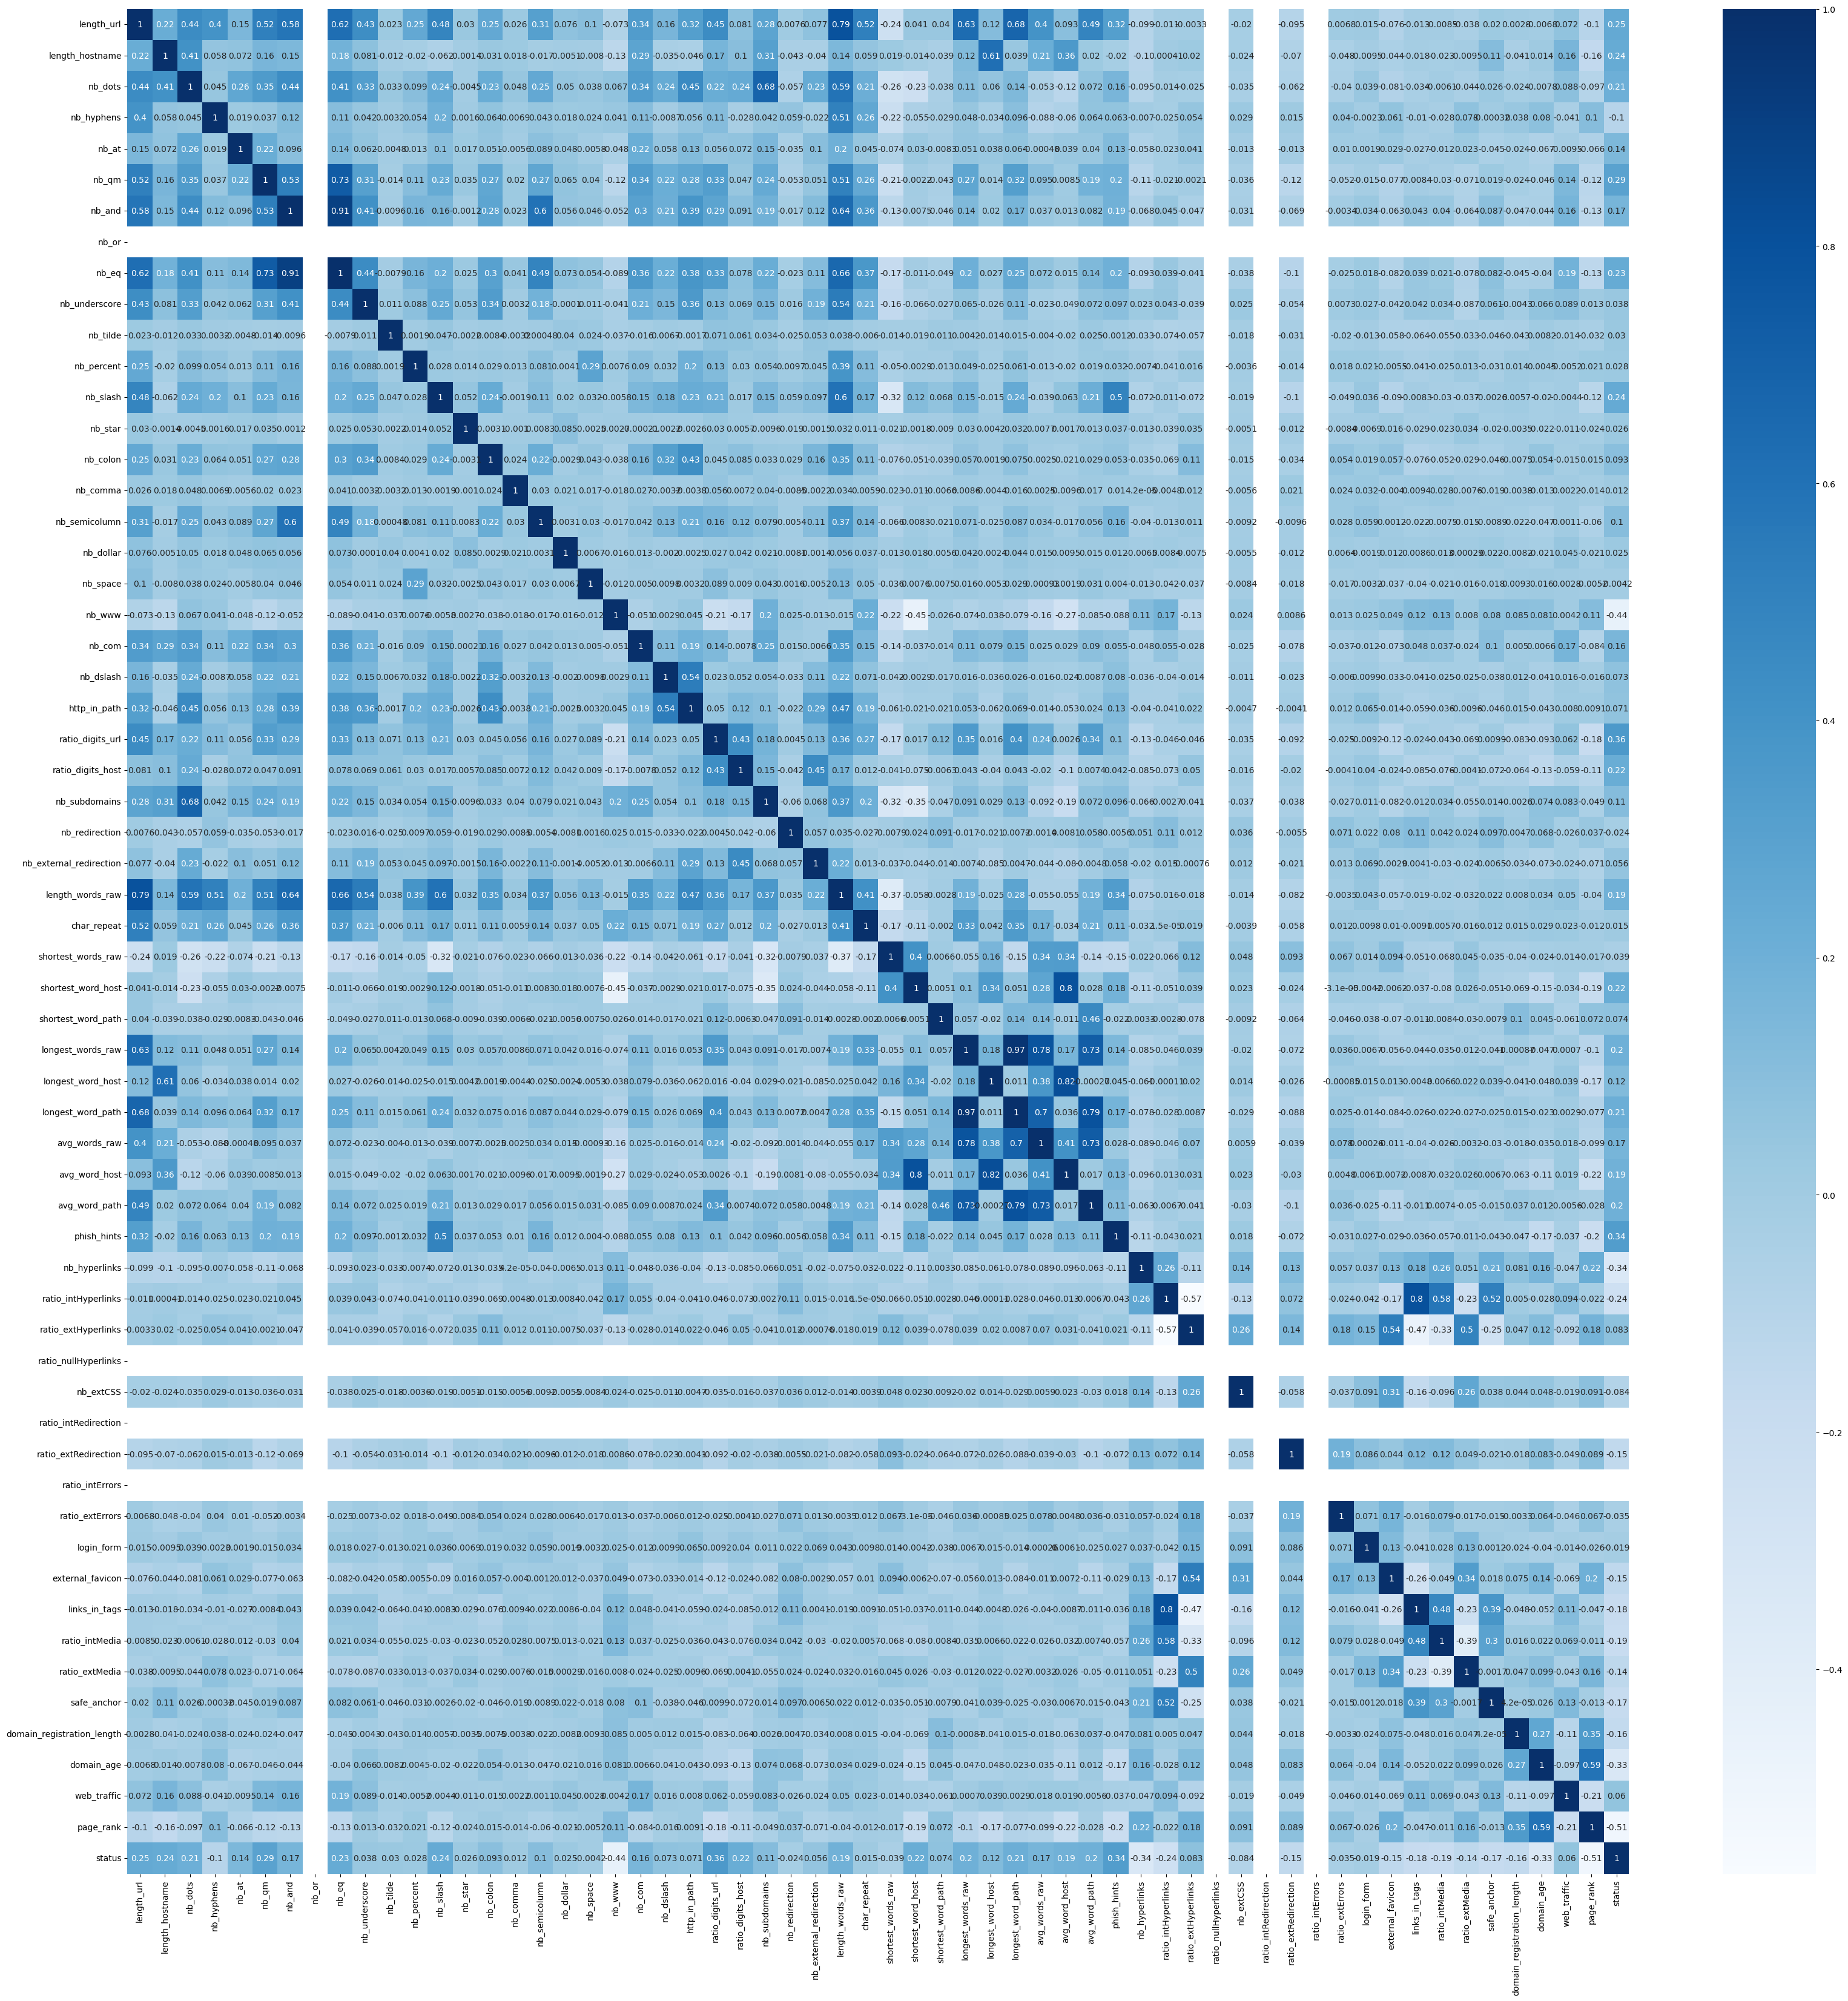

In [10]:
# Obtener matriz de correlación
corr = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, cmap='Blues', annot = True)
plt.show()

En el diagrama de calor de las correlaciones podemos observar que existen correlaciones fuertes sobre todo entre características similares de la URL, por ejemplo, entre el número de caracteres especiales que tiene la URL, lo cuál nos quiere decir que una dirección de phishing tiene varios caracteres especiales repetidos.

También existe una correlación fuerte entre la longitud de palabras que se encuentran en la URL, las palabras más largas, más cortas y promedio de palabras, esto de igual manera nos puede indicar que una dirección phishing tiene muchas palabras y también que una dirección legítima tiene menos.

También puedo notar que la variable "length_url" (longitud de la URL) tiene una correlación moderada y fuerte con muchas variables, esto se debe a que la URL está compuesta por el resto de variables.

Existen varias variables que al parecer no tienen información relevante ya que no se muestran valores, se debe revisar.

Con respecto a nuestra variable objetivo "status", la correlación más importante es con page_rank, tiene una correlación negativa de 0.51, lo que nos quiere decir que a menos ranking de página la URL tiene más probabilidad de ser Phishing.

In [11]:
# Revisar variables que no muestran información en el mapa de calor
df.nb_or.value_counts()

0    11430
Name: nb_or, dtype: int64

In [12]:
df.ratio_nullHyperlinks.value_counts()

0    11430
Name: ratio_nullHyperlinks, dtype: int64

In [13]:
df.ratio_intRedirection.value_counts()

0    11430
Name: ratio_intRedirection, dtype: int64

In [14]:
df.ratio_intErrors.value_counts()

0    11430
Name: ratio_intErrors, dtype: int64

Todas las variables sólo tienen el valor 0, por lo que no aportarían a nuestro modelo, se eliminará dichas variables.

In [15]:
df.drop(columns=['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_intErrors'], inplace=True)

In [16]:
# Revisar estadísticas de variables numéricas
df.describe()

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,safe_anchor,domain_registration_length,domain_age,web_traffic,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000
mean,61.126684,21.090289,2.480752,0.997550,0.022222,0.141207,0.162292,0.293176,0.322660,0.006649,...,0.442170,51.978211,42.870444,23.236293,37.063922,492.532196,4062.543745,8.567566e+05,3.185739,0.500000
std,55.297318,10.777171,1.369686,2.087087,0.155500,0.364456,0.821337,0.998317,1.093336,0.081274,...,0.496666,41.523144,46.249897,38.386577,39.073385,814.769415,3107.784600,1.995606e+06,2.536955,0.500022
min,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000
25%,33.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,1.000000,0.000000
50%,47.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,60.000000,11.111111,0.000000,23.294574,242.000000,3993.000000,1.651000e+03,3.000000,0.500000
75%,71.000000,24.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,98.061004,100.000000,33.333333,75.000000,449.000000,7026.750000,3.738455e+05,5.000000,1.000000
max,1641.000000,214.000000,24.000000,43.000000,4.000000,3.000000,19.000000,19.000000,18.000000,1.000000,...,1.000000,100.000000,100.000000,100.000000,100.000000,29829.000000,12874.000000,1.076799e+07,10.000000,1.000000


Veo que existen varios outliers, sin embargo, creo que es normal dado la naturaleza y diferencias que pueden tener las URL, llama la atención los valores negativos en "domain_registration_length" y "domain_age", es probable que al momento de la consulta del registro no se tuvo información del mismo y se colocó -1 para no colocar valores positivos. Revisaré esas variables.

In [17]:
# Verificar valores en domain_registration_length
df.loc[(df['domain_registration_length'] < 0), 'domain_registration_length'].value_counts()

-1    46
Name: domain_registration_length, dtype: int64

In [18]:
# Verificar distribución de páginas phishing y legítimas con esos valores
df.loc[(df['domain_registration_length'] < 0), 'status'].value_counts()

0    32
1    14
Name: status, dtype: int64

El valor -1 en la variable domain_registration_length no es indicador de phishing, se observa dominios legítimos que también tienen ese valor, dejaré los valores como se encuentran.

In [19]:
# Verificar valores en domain_age
df.loc[(df['domain_age'] < 0), 'domain_age'].value_counts()

-1     1781
-2       55
-12       1
Name: domain_age, dtype: int64

In [20]:
# Verificar distribución de páginas phishing y legítimas con esos valores
df.loc[(df['domain_age'] < 0), 'status'].value_counts()

1    994
0    843
Name: status, dtype: int64

Se observa que tampoco es un indicador de phishing el valor -1 en domain_age, sin embargo existe 56 valores que tienen un valor de -2 y -12, voy a estandarizar todos esos valores a -1

In [21]:
# Cambiar -2 y -12 a -1 en la variable domain_age
df['domain_age'] = df['domain_age'].replace({-2: -1, -12: -1})
df.loc[(df['domain_age'] < 0), 'domain_age'].value_counts()

-1    1837
Name: domain_age, dtype: int64

Verificar variables categóricas

In [22]:
from sklearn.compose import make_column_selector
cat_selector = make_column_selector(dtype_include='object')

In [23]:
columnas_categoricas = cat_selector(df)

In [24]:
# Creo un for para revisar de manera más rápida las variables categóricas excepto la columna 'url' que tiene todas las URLs
columnas_categoricas.remove('url')
for col in columnas_categoricas:
  print(df[col].value_counts())

0    9709
1    1721
Name: ip, dtype: int64
1    6983
0    4447
Name: https_token, dtype: int64
0    11426
1        4
Name: punycode, dtype: int64
0    11403
1       27
Name: port, dtype: int64
0    10680
1      750
Name: tld_in_path, dtype: int64
0    10857
1      573
Name: tld_in_subdomain, dtype: int64
0    11183
1      247
Name: abnormal_subdomain, dtype: int64
0    9116
1    2314
Name: prefix_suffix, dtype: int64
0    10478
1      952
Name: random_domain, dtype: int64
0    10019
1     1411
Name: shortening_service, dtype: int64
0    11428
1        2
Name: path_extension, dtype: int64
0    10239
1     1191
Name: domain_in_brand, dtype: int64
0    11383
1       47
Name: brand_in_subdomain, dtype: int64
0    11374
1       56
Name: brand_in_path, dtype: int64
0    11225
1      205
Name: suspecious_tld, dtype: int64
0    11053
2      306
1       71
Name: statistical_report, dtype: int64
0    11430
Name: submit_email, dtype: int64
0    11430
Name: sfh, dtype: int64
0    11415
1       15


La variable statistical_report tiene valores 0, 1 y 2, sin embargo, según el diccionario de datos sólo debería tener los valores 1 que indica que la dirección IP corresponde a un dominio de phishing registrado y 0 que no corresponde. Voy a revisar si los valores de 2 corresponden o dominios de Phishing o Legítimos.

In [25]:
# Confirmar si los valores 2 corresponden a phishing
df.loc[(df['statistical_report'] == 2),  'status'].value_counts()

1    278
0     28
Name: status, dtype: int64

In [26]:
# Confirmar si los valores 0 y 1 corresponden sólo a sitios legítimos y a phishing respectivamente.
df.loc[(df['statistical_report'] == 0),  'status'].value_counts()

0    5674
1    5379
Name: status, dtype: int64

In [27]:
df.loc[(df['statistical_report'] == 1),  'status'].value_counts()

1    58
0    13
Name: status, dtype: int64

Podemos observar que tanto los valores de 0 y 1 representan sitios phishing como legítimos, por tanto imputaré la moda (valor que más se repite) al valor 2.

In [28]:
df['statistical_report'].mode()

0    0
Name: statistical_report, dtype: object

In [29]:
df['statistical_report'] = df['statistical_report'].replace({2: 0})
df['statistical_report'].value_counts()

0    11359
1       71
Name: statistical_report, dtype: int64

La limpieza de la base de datos concluye.

## Visualizaciones

In [41]:
# Definir estilo y paletas para todos los gráficos
plt.style.use('seaborn-v0_8-pastel')
sns.set_palette('muted')

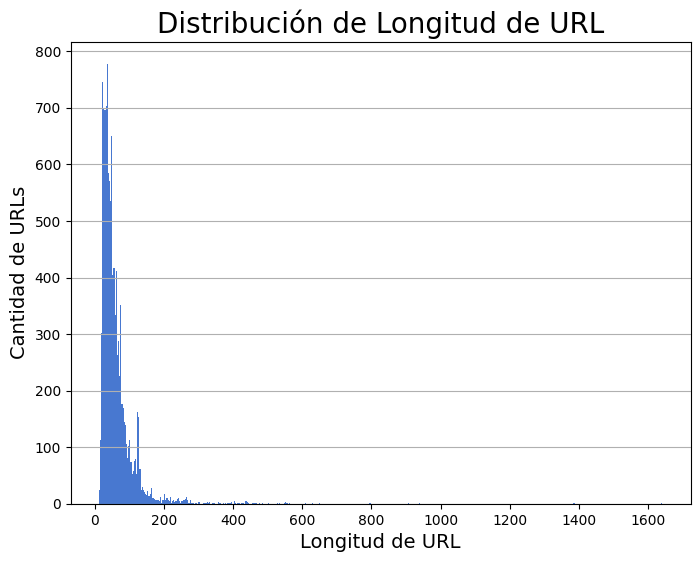

In [42]:
# Histograma de la longitud de la URL
plt.figure(figsize=(8,6))
plt.hist(df['length_url'], bins=500)
plt.title('Distribución de Longitud de URL', fontsize=20)
plt.xlabel('Longitud de URL', fontsize=14)
plt.ylabel('Cantidad de URLs', fontsize=14)
plt.grid(axis='y')
plt.show()

Podemos observar la distribución de la longitud de URL, la mayor cantidad de URLs se concentran hasta los 150 caracteres en longitud.

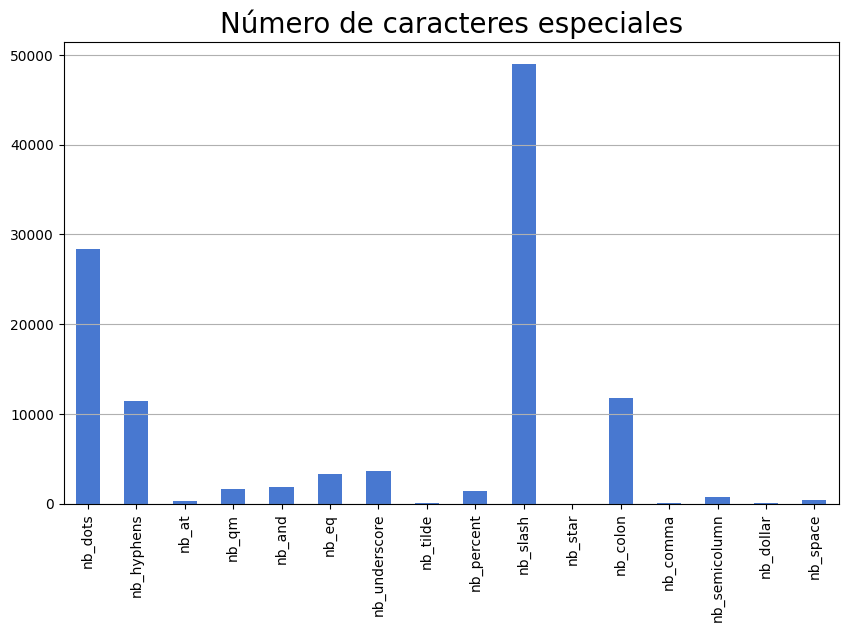

In [43]:
# Número de caracteres especiales
plt.figure(figsize=(10,6))
df[['nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space']].sum().plot.bar()
plt.title('Número de caracteres especiales', fontsize=20)
plt.grid(axis='y')
plt.show()

En este gráfico podemos observar los caracteres especiales más comunes en las URLs.

<Figure size 1000x1000 with 0 Axes>

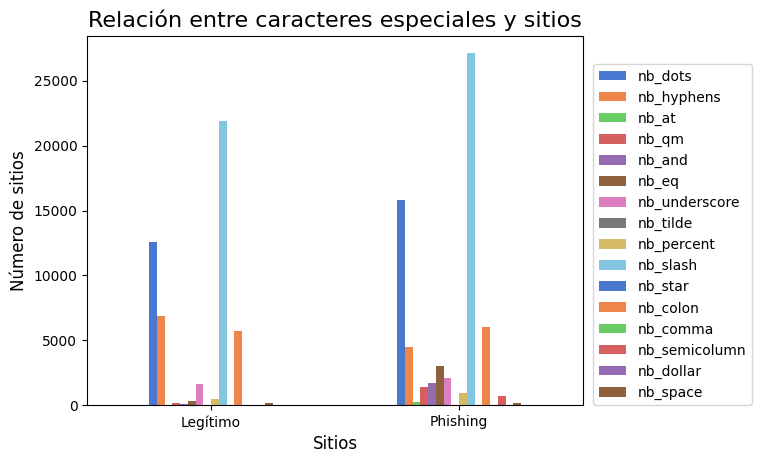

In [103]:
# Relación entre caracteres especiales y sitios legítimos y phishing
plt.figure(figsize=(10,10))
df.groupby('status')[['nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space']].sum().plot.bar();
plt.title('Relación entre caracteres especiales y sitios', fontsize=16)
plt.xlabel('Sitios', fontsize=12)
plt.ylabel('Número de sitios', fontsize=12)
plt.xticks([0, 1], ['Legítimo', 'Phishing'])
plt.xticks(rotation=0)
plt.legend(loc=(1.02, 0))
plt.show();

Se puede observar que los caracteres como punto, guiones y slash, con comunes en los dos tipos de sitio, sin embargo, en los sitios de phishing existe mayor número de caracteres como signo de interrogación, ampersand, igual y guión bajo.

<Figure size 1000x1000 with 0 Axes>

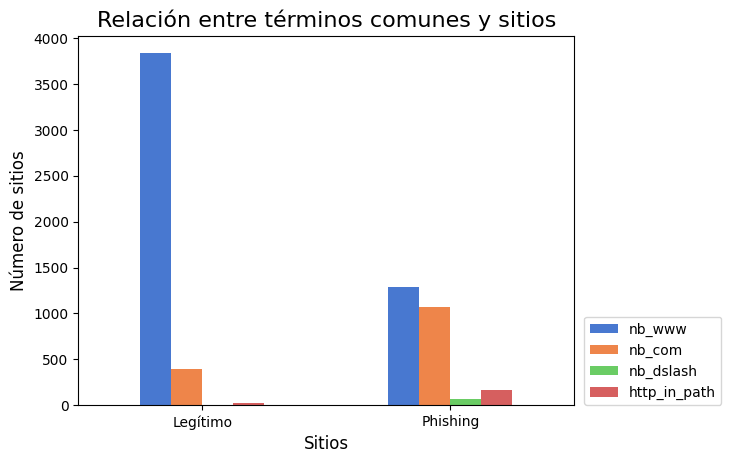

In [104]:
# Relación entre términos comunes y sitios legítimos y phishing
plt.figure(figsize=(10,10))
df.groupby('status')[['nb_www', 'nb_com', 'nb_dslash', 'http_in_path']].sum().plot.bar();
plt.title('Relación entre términos comunes y sitios', fontsize=16)
plt.xlabel('Sitios', fontsize=12)
plt.ylabel('Número de sitios', fontsize=12)
plt.xticks([0, 1], ['Legítimo', 'Phishing'])
plt.xticks(rotation=0)
plt.legend(loc=(1.02, 0))
plt.show();

Con respecto a los términos comunes (www, .com, // y http dentro del path), podemos notar que los sitios legítimos tienen es su mayoría la palabra www, en cambio los sitios phishing podemos notar que no necesariamente tienen www, además es más común que tengan la palabra http dentro del path, es decir, después del dominio.

<Figure size 1000x1000 with 0 Axes>

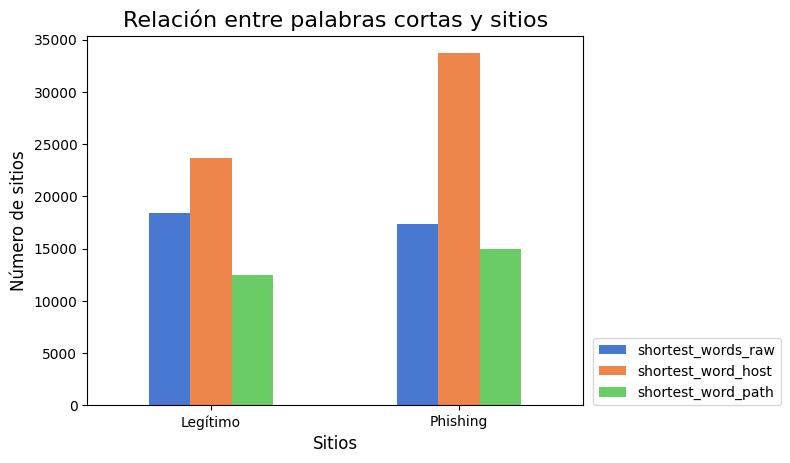

In [106]:
# Relación entre palabras cortas y sitios legítimos y phishing
plt.figure(figsize=(10,10))
df.groupby('status')[['shortest_words_raw', 'shortest_word_host', 'shortest_word_path']].sum().plot.bar();
plt.title('Relación entre palabras cortas y sitios', fontsize=16)
plt.xlabel('Sitios', fontsize=12)
plt.ylabel('Número de sitios', fontsize=12)
plt.xticks([0, 1], ['Legítimo', 'Phishing'])
plt.xticks(rotation=0)
plt.legend(loc=(1.02, 0))
plt.show();

Observamos que los sitios Phishing tienden a tener una mayor cantidad de palabras cortas en el nombre del host en comparación con los sitios legítimos.

<Figure size 1000x1000 with 0 Axes>

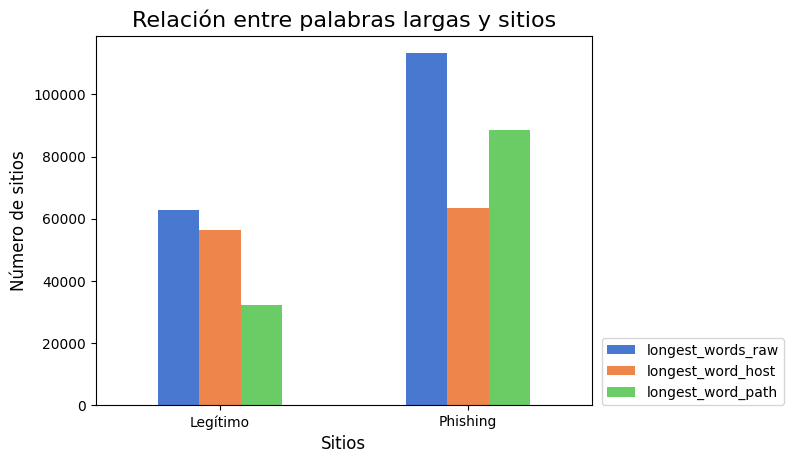

In [107]:
# Relación entre palabras largas y sitios legítimos y phishing
plt.figure(figsize=(10,10))
df.groupby('status')[['longest_words_raw', 'longest_word_host', 'longest_word_path']].sum().plot.bar();
plt.title('Relación entre palabras largas y sitios', fontsize=16)
plt.xlabel('Sitios', fontsize=12)
plt.ylabel('Número de sitios', fontsize=12)
plt.xticks([0, 1], ['Legítimo', 'Phishing'])
plt.xticks(rotation=0)
plt.legend(loc=(1.02, 0))
plt.show();

Observamos que los sitios de Phishing tienden a tener una mayor cantidad de palabras largas tango en la URL como en el path.

<Figure size 1000x1000 with 0 Axes>

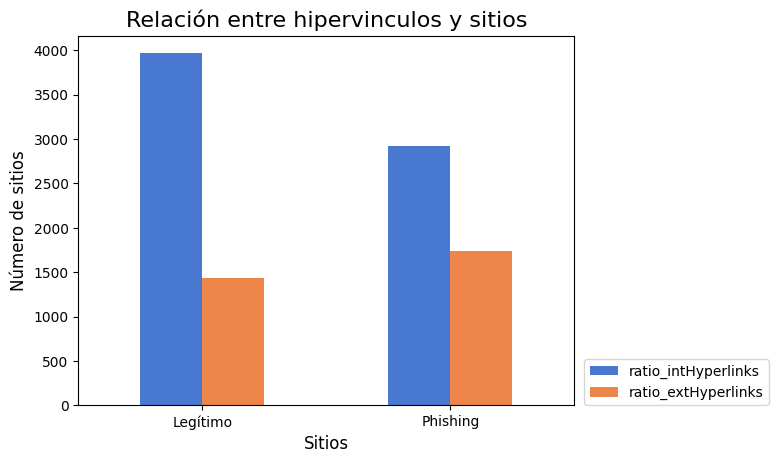

In [109]:
# Relación entre hipervinculos internos y externos y sitios legítimos y phishing
plt.figure(figsize=(10,10))
df.groupby('status')[['ratio_intHyperlinks', 'ratio_extHyperlinks']].sum().plot.bar();
plt.title('Relación entre hipervinculos y sitios', fontsize=16)
plt.xlabel('Sitios', fontsize=12)
plt.ylabel('Número de sitios', fontsize=12)
plt.xticks([0, 1], ['Legítimo', 'Phishing'])
plt.xticks(rotation=0)
plt.legend(loc=(1.02, 0))
plt.show();

Observamos que los sitios Pishing tienen una mayor antidad de hiperviculos externos en comparación con los sitios legítimos que tienen una mayor cantidad de vínculos internos, que es lo esperado.

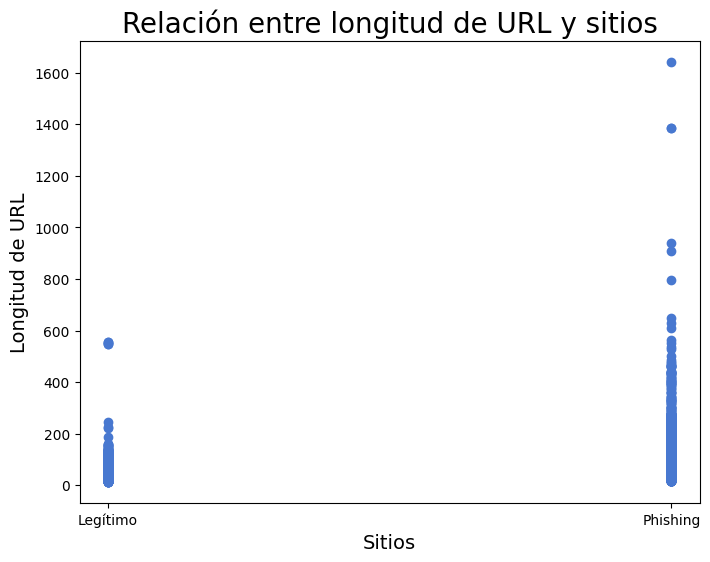

In [33]:
# Relación entre la longitud de la URL con sitios Phishing
plt.figure(figsize=(8,6))
plt.scatter(df['status'], df['length_url'])
plt.title('Relación entre longitud de URL y sitios', fontsize=20)
plt.xlabel('Sitios', fontsize=14)
plt.ylabel('Longitud de URL', fontsize=14)
plt.xticks([0, 1], ['Legítimo', 'Phishing'])
plt.show()

Se puede observar que los sitios legítimos tienden a tener una URL más corta y los sitios phishing la URL mucho más larga.

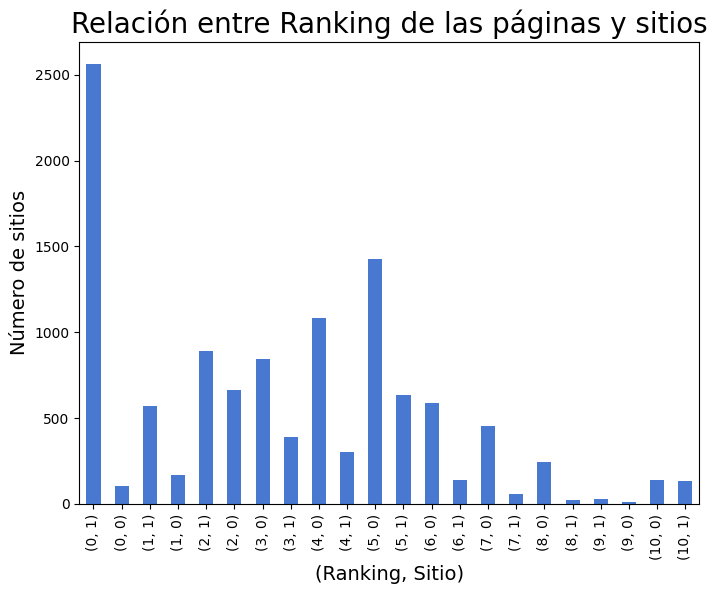

In [133]:
# Relación entre el Ranking de las páginas con sitios Phishing
plt.figure(figsize=(8,6))
df.groupby('page_rank')['status'].value_counts().plot.bar()
plt.title('Relación entre Ranking de las páginas y sitios', fontsize=20)
plt.xlabel('(Ranking, Sitio)', fontsize=14)
plt.ylabel('Número de sitios', fontsize=14)
plt.show()

En este gráfico podemos observar en el eje X una tupla entre el ranking y el tipo de sitio (0: legítimo y 1: phishing), se nota que cuando el ranking es 0 o 1 la página tiene una alta probabilidad de ser phishing.